In [17]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('C:/Users/wangs/OneDrive/桌面/issues.csv')
# Print head
papers.head()

,Reason_text
0,increase power
1,conservative operations alert
2,one cool tower transformer oos
3,power supply alert
4,hold power due to s g condition


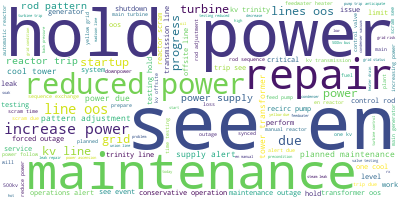

In [24]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['Reason_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [19]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.Reason_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['increase', 'power']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wangs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1)]


In [21]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.060*"power" + 0.043*"rod" + 0.031*"pump" + 0.025*"kv" + '
  '0.024*"maintenance" + 0.022*"adjustment" + 0.022*"oos" + 0.021*"control" + '
  '0.021*"see" + 0.021*"en"'),
 (1,
  '0.057*"power" + 0.048*"maintenance" + 0.031*"see" + 0.028*"en" + '
  '0.027*"reactor" + 0.025*"outage" + 0.021*"oos" + 0.019*"reduced" + '
  '0.019*"trip" + 0.019*"heater"'),
 (2,
  '0.113*"power" + 0.035*"alert" + 0.026*"due" + 0.025*"increase" + '
  '0.021*"supply" + 0.020*"hold" + 0.019*"leak" + 0.018*"generator" + '
  '0.017*"grid" + 0.016*"repair"'),
 (3,
  '0.053*"power" + 0.043*"hold" + 0.035*"oos" + 0.034*"pump" + 0.031*"due" + '
  '0.031*"maintenance" + 0.023*"kv" + 0.023*"line" + 0.017*"reduced" + '
  '0.017*"repair"'),
 (4,
  '0.049*"alert" + 0.043*"conservative" + 0.043*"due" + 0.036*"power" + '
  '0.033*"operations" + 0.030*"reactor" + 0.023*"progress" + 0.020*"see" + '
  '0.017*"event" + 0.017*"hold"'),
 (5,
  '0.059*"power" + 0.046*"hold" + 0.039*"oos" + 0.030*"trip" + 0.027*"reactor" '
